# Pymaceuticals Inc.
---

### Analysis

- There is a positive relationship between mouse weight and their tumor volume. Heavier mice will have heavier tumors than smaller mice.  Capomulin is one of the most effective drug regimens to treat tumors in mice. When looking at mouse l509, the drug Capomulin greatly reduced its tumor size. 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merged_mouse_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
merged_mouse_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/Mouse_metadata.csv'

In [4]:
# Checking the number of mice.
total_mice = merged_mouse_data["Mouse ID"].unique().size
total_mice


NameError: name 'merged_mouse_data' is not defined

In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
temp = merged_mouse_data.loc[merged_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID']

duplicate_mouse_ids = temp.unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_mouse_data.loc[merged_mouse_data['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = merged_mouse_data.loc[merged_mouse_data['Mouse ID'] != duplicate_mouse_ids[0]]
cleaned_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [ ]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = cleaned_mouse_data["Mouse ID"].unique().size
cleaned_mouse_count

248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

per_regimen_summary = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': var,
    'Tumor Volume Std. Dev.': std,
    'Tumor Volume Std. Err.': sem,})


per_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [ ]:
## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

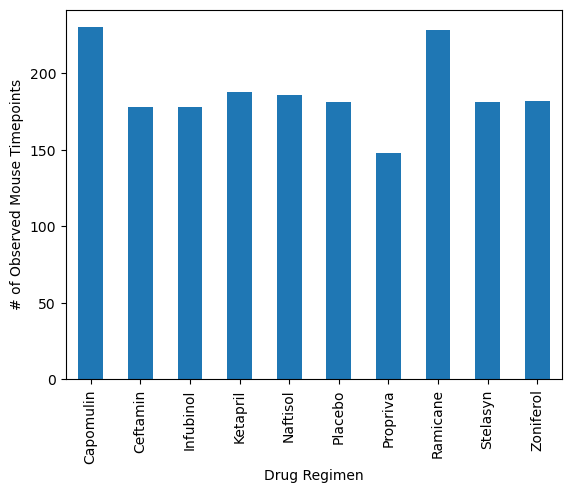

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
observed_per_regimen = cleaned_mouse_data.groupby('Drug Regimen')['Timepoint'].count()
observed_per_regimen


drug_regimen_bar = observed_per_regimen.plot(kind="bar")
drug_regimen_bar.set_ylabel("# of Observed Mouse Timepoints")


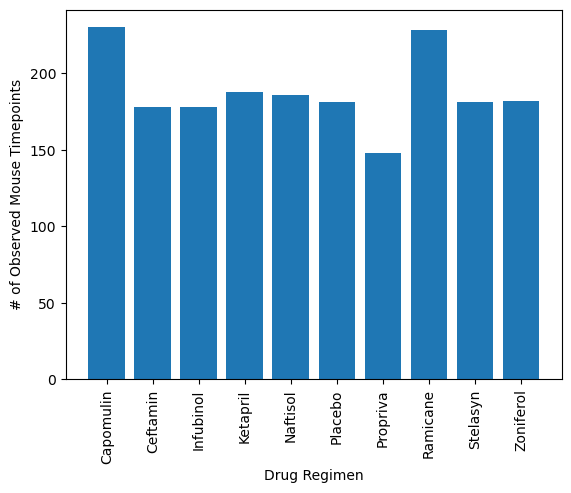

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug = observed_per_regimen.index
timepoints = observed_per_regimen.values

plt.bar(drug, timepoints)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

plt.show()

Text(0, 0.5, 'Sex')

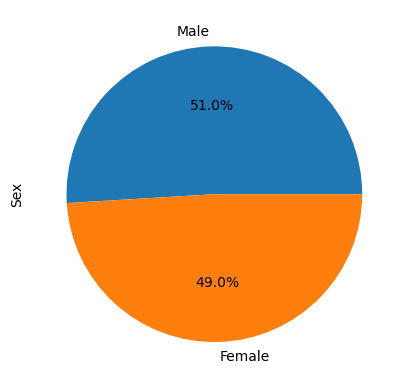

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_sex = cleaned_mouse_data['Sex'].value_counts()

mouse_sex_pie = mouse_sex.plot(kind = 'pie', autopct='%1.1f%%')
mouse_sex_pie.set_ylabel("Sex")

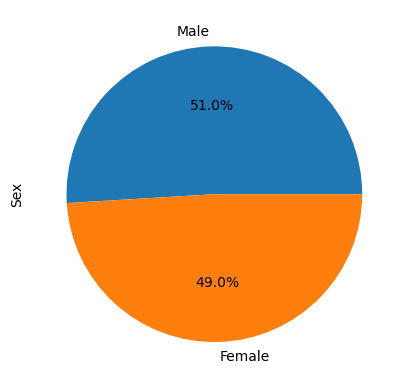

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_sex_chart = plt.pie(mouse_sex, autopct="%1.1f%%", labels=mouse_sex.index)
plt.ylabel('Sex') 

plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_greatest_timepoint = cleaned_mouse_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_greatest_timepoint = pd.merge(cleaned_mouse_data, last_greatest_timepoint, on=["Mouse ID", "Timepoint"])
last_greatest_timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    # need each specified treatment for tumor volume
    treatment_data = last_greatest_timepoint[last_greatest_timepoint["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # individual drug regimen added to the tumor_vol
    tumor_vol.append(treatment_data)


#Match each individual drug with the corresponding tumor volumes

for i, vol in enumerate(tumor_vol):
    drug = treatments[i]
    quartiles = vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f"The median of {drug} is: {quartiles[.5]}")
    print(f"The lower quartile for {drug} is: {lowerq}")
    print(f"The upper quartile for {drug} is: {upperq}")
    print(f"The interquartile range for {drug} is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    volumes_list = vol.tolist()
    
    outliers = vol[(vol < lower_bound) | (vol > upper_bound)].tolist()
    print(f"Potential outliers for {drug}: {outliers}\n")


The median of Capomulin is: 38.1251644
The lower quartile for Capomulin is: 32.37735684
The upper quartile for Capomulin is: 40.1592203
The interquartile range for Capomulin is: 7.781863460000004
Potential outliers for Capomulin: []

The median of Ramicane is: 36.56165229
The lower quartile for Ramicane is: 31.56046955
The upper quartile for Ramicane is: 40.65900627
The interquartile range for Ramicane is: 9.098536719999998
Potential outliers for Ramicane: []

The median of Infubinol is: 60.16518046
The lower quartile for Infubinol is: 54.04860769
The upper quartile for Infubinol is: 65.52574285
The interquartile range for Infubinol is: 11.477135160000003
Potential outliers for Infubinol: [36.3213458]

The median of Ceftamin is: 59.85195552
The lower quartile for Ceftamin is: 48.72207785
The upper quartile for Ceftamin is: 64.29983003
The interquartile range for Ceftamin is: 15.577752179999997
Potential outliers for Ceftamin: []



In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
distribution = tumor_vol
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)
plt.boxplot(distribution)
plt.grid()
plt.show()

NameError: name 'tumor_vol' is not defined

## Line and Scatter Plots

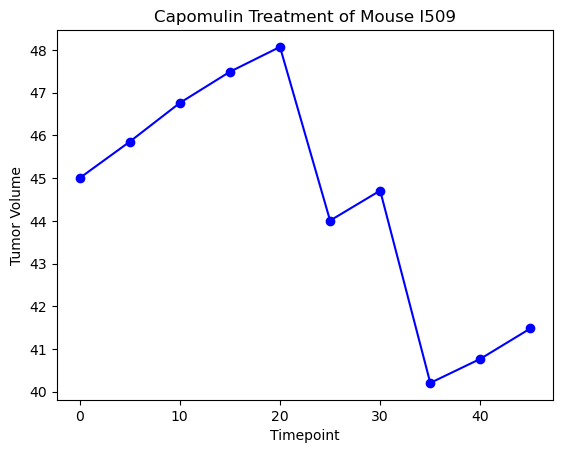

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']
capomulin_data

#single mouse 
mouse_id = ['l509']
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'].isin(mouse_id)]


plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Capomulin Treatment of Mouse I509')


# Show the plot
plt.show()


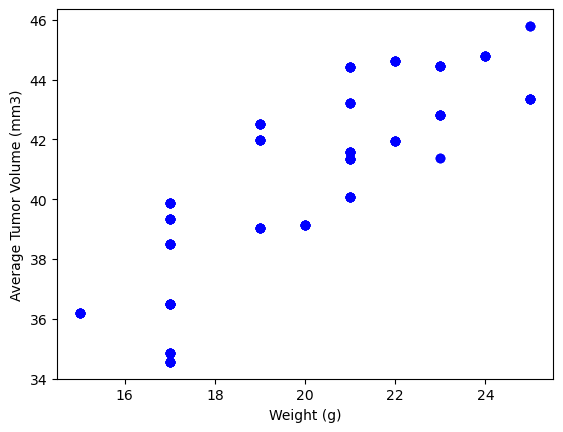

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']
capomulin_data

# average tumor volume 
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# merging tumor volume with the capolumlin data so that the weight can be added to the scatter plot
volume_and_weight = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID', suffixes=('_original', '_average'))

plt.scatter(volume_and_weight['Weight (g)'], volume_and_weight['Tumor Volume (mm3)_average'], color='blue', alpha=0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.8343958614425964


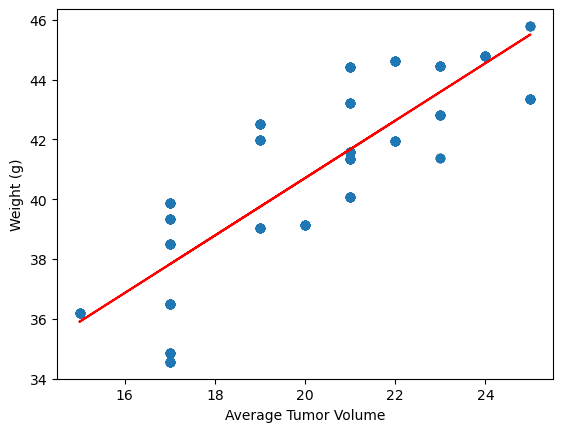

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = st.pearsonr(volume_and_weight['Weight (g)'], volume_and_weight['Tumor Volume (mm3)_average'])[0]
print(f'The correlation between mouse weight and the average tumor volume is: {correlation_coefficient}')

x_values = volume_and_weight['Weight (g)']
y_values = volume_and_weight['Tumor Volume (mm3)_average']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume')
plt.ylabel('Weight (g)')
plt.show()


